In [1]:
!pip install nltk

In [2]:
import string
import re
import numpy as np
from numpy.linalg import norm
import pandas as pd
from collections import Counter, OrderedDict

import seaborn as sns
import matplotlib.pyplot as plt

import math

import nltk

from sklearn.feature_extraction import DictVectorizer

%matplotlib inline
pd.options.display.max_colwidth=500

In [3]:
# Load in training data and display in pandas dataframe
train_path='training.csv'
train_data = pd.read_csv(train_path,  delimiter="\t", skip_blank_lines = True)
val_path ='val.csv'
val_data = pd.read_csv(val_path,  delimiter="\t", skip_blank_lines = True)
test_path ='test.csv'
test_data = pd.read_csv(test_path,  delimiter="\t", skip_blank_lines = True)

# Inspect
train_data

,Episode,Scene,Character_name,Line,Gender
0,s01e01,c01,Monica Geller,There's nothing to tell! He's just some guy I work with!,Female
1,s01e01,c01,Joey Tribbiani,"C'mon, you're going out with the guy! There's gotta be something wrong with him!",Male
2,s01e01,c01,Chandler Bing,"All right Joey, be nice. So does he have a hump? A hump and a hairpiece?",Male
3,s01e01,c01,Phoebe Buffay,"Wait, does he eat chalk?",Female
4,s01e01,c01,Phoebe Buffay,"Just, 'cause, I don't want her to go through what I went through with Carl- oh!",Female
...,...,...,...,...,...
53548,s03e25,c12,Ross Geller,Hi.,Male
53549,s03e25,c13,Chandler Bing,Hi there.,Male
53550,s03e25,c13,Monica Geller,That's that weird voice again.,Female
53551,s03e25,c13,Chandler Bing,"Okay! Okay! Let me try it again, you're gonna wanna date this next guy, I swear!",Male


In [4]:
# Create one document per character
def create_character_document_from_dataframe(df, max_line_count):
    """Returns a dict with the name of the character as key,
    their lines joined together as a single string, with end of line _EOL_
    markers between them

    Improve this for Q3
    
    ::max_line_count:: the maximum number of lines to be added per character
    """
    character_docs = {}
    character_line_count = {}
    for line, name, gender in zip(df.Line, df.Character_name, df.Gender):
        #remove the empty lines
        if (isinstance(line, float) and math.isnan(line)) or line == "":
            continue
        if not name in character_docs.keys():
            character_docs[name] = ""
            character_line_count[name] = 0
        if character_line_count[name]==max_line_count:
            continue
        character_docs[name] += str(line)   + " _EOL_ "  # adding an end-of-line token
        character_line_count[name]+=1
    print("lines per character", character_line_count)
    return character_docs

In [5]:
# print out the number of words each character has in the training set
# only use the first 300 lines of each character
train_character_docs = create_character_document_from_dataframe(train_data, max_line_count=300)
print('Num. Characters: ',len(train_character_docs.keys()),"\n")
total_words = 0
for name in train_character_docs.keys():
    print(name, 'Number of Words: ',len(train_character_docs[name].split()))
    total_words += len(train_character_docs[name].split())
print("total words", total_words)

lines per character {'Monica Geller': 300, 'Joey Tribbiani': 300, 'Chandler Bing': 300, 'Phoebe Buffay': 300, '#ALL#': 300, 'Ross Geller': 300, 'Rachel Green': 300, 'Other_None': 300, 'Other_Female': 300, 'Other_Male': 300}
Num. Characters:  10 

Monica Geller Number of Words:  2937
Joey Tribbiani Number of Words:  3119
Chandler Bing Number of Words:  3963
Phoebe Buffay Number of Words:  3448
#ALL# Number of Words:  999
Ross Geller Number of Words:  3477
Rachel Green Number of Words:  3725
Other_None Number of Words:  2920
Other_Female Number of Words:  2765
Other_Male Number of Words:  3168
total words 30521


Improve pre-processing
Using the pre-processing techniques you have learned in the module, improve the `pre_process` function above, which currently just tokenizes text based on white space.

When developing, use the first 300 and 30 lines from the training and validation files, as per above. To check the improvements by using the different techniques, use the `compute_IR_evaluation_scores` function as above. The **mean rank** is the main metric you need to focus on improving throughout this assignment, where the target/best possible performance is **1** (i.e. all test/validation data character documents are closest to their corresponding training data character documents) and the worst is **10**. Initially, the code in this template achieves a mean rank of **4.0**  and accuracy of **0.3** on the test set and a mean rank of **4.2** and accuracy of **0.1** on the validation set - you should be looking to improve those, particularly getting the mean rank as close to 1 as possible.


In [6]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer  

# Ensure you have the necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

def pre_process(character_text):
    """Pre-process all the concatenated lines of a character,
    using tokenization, lowercasing, removing punctuation, and other techniques.

    ::character_text:: a string with all of one character's lines
    """
    # Lowercasing
    character_text = character_text.lower()

    # Remove punctuation
    character_text = re.sub(r'[^\w\s]', '', character_text)

    # Tokenization
    tokens = nltk.word_tokenize(character_text)

    # Remove stopwords
    tokens = [word for word in tokens if word not in stopwords.words('english')]

    # Stemming (replacing lemmatization with stemming)
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    return tokens


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nikhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
# create list of pairs of (character name, pre-processed character) 
training_corpus = [(name, pre_process(doc)) for name, doc in sorted(train_character_docs.items())]
train_labels = [name for name, doc in training_corpus]

Improve linguistic feature extraction
Use the feature extraction techniques you have learned to improve the `to_feature_vector_dictionary` and `create_document_matrix_from_corpus` functions above. Examples of extra features could include extracting n-grams of different lengths and including POS tags. You could also use sentiment analysis or another text classifier's result when applied to the features for each character document. You could even use a gender classifier trained on the same data using the GENDER column **(but DO NOT USE the GENDER column directly in the features for the final vector)**.

Matrix transformation techniques like TF-IDF (https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html) are commonly used to improve the `create_document_matrix_from_corpus` function, which currently only uses a dictionary vectorizer (`DictVectorizer`) which straight-forwardly maps from the feature dictionaries produced for each character document to a sparse matrix.

Other options include using feature selection/reduction with techniques like minimum/maximum document frequency and/or feature selection like k-best selection using different statistical tests https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html. 

Again, develop your system using the training and validation sets and note the effect/improvement in mean rank with the techniques you use.

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.util import ngrams
from nltk import pos_tag

def to_feature_vector_dictionary(character_doc, extra_features):
    # Create a TF-IDF vectorizer and fit_transform on the character_doc
    tfidf_vectorizer = TfidfVectorizer()
    tfidf_vector = tfidf_vectorizer.fit_transform([' '.join(character_doc)])
    tfidf_features = dict(zip(tfidf_vectorizer.get_feature_names_out(), tfidf_vector.toarray()[0]))

    # Generate n-grams (e.g., bigrams, trigrams)
    bigrams = ['_'.join(gram) for gram in ngrams(character_doc, 2)]
    trigrams = ['_'.join(gram) for gram in ngrams(character_doc, 3)]

    # Count n-grams
    bigram_counts = Counter(bigrams)
    trigram_counts = Counter(trigrams)

    # POS Tagging
    pos_tags = pos_tag(character_doc)
    pos_counts = Counter(tag for word, tag in pos_tags)

    # Combine all features
    feature_vector = {**tfidf_features, **bigram_counts, **trigram_counts, **pos_counts}

    # Add extra features
    for feature in extra_features:
        feature_vector[feature] += 1

    return feature_vector


In [9]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction import DictVectorizer

corpusVectorizer = DictVectorizer()  # Vectorizer for converting feature dicts to vectors
tfidf_transformer = TfidfTransformer()  # TF-IDF transformer

def create_document_matrix_from_corpus(corpus, fitting=False):
    """Method which fits different vectorizers on data and returns a matrix.
    
    ::corpus:: a list of (class_label, document) pairs.
    ::fitting:: a boolean indicating whether to fit/train the vectorizers (should be true on training data)
    """
    # Extract feature vectors for the corpus
    feature_dicts = [to_feature_vector_dictionary(doc, []) for name, doc in corpus]
    
    # Fit and transform the corpus using DictVectorizer and then apply TF-IDF transformation
    if fitting:
        corpusVectorizer.fit(feature_dicts)
        transformed_corpus = corpusVectorizer.transform(feature_dicts)
        tfidf_transformer.fit(transformed_corpus)
    else:
        transformed_corpus = corpusVectorizer.transform(feature_dicts)

    # Apply TF-IDF transformation
    doc_feature_matrix = tfidf_transformer.transform(transformed_corpus)
    
    return doc_feature_matrix

# Create the training feature matrix
training_feature_matrix = create_document_matrix_from_corpus(training_corpus, fitting=True)


In [10]:
training_feature_matrix

<10x30162 sparse matrix of type '<class 'numpy.float64'>'
	with 37879 stored elements in Compressed Sparse Row format>

In [11]:
# get the validation data- only 30 lines used for each character
val_character_docs = create_character_document_from_dataframe(val_data, max_line_count=30)
print('Num. Characters: ',len(val_character_docs.keys()),"\n")
total_words = 0
for name in val_character_docs.keys():
    print(name, 'Num of Words: ',len(val_character_docs[name].split()))
    total_words += len(val_character_docs[name].split())
print("total words", total_words)

# create list of pairs of (character name, pre-processed character) 
val_corpus = [(name, pre_process(doc)) for name, doc in sorted(val_character_docs.items())]
val_labels = [name for name, doc in val_corpus]

lines per character {'Other_None': 30, 'Rachel Green': 30, 'Other_Male': 30, 'Ross Geller': 30, '#ALL#': 18, 'Phoebe Buffay': 30, 'Chandler Bing': 30, 'Monica Geller': 30, 'Joey Tribbiani': 30, 'Other_Female': 30}
Num. Characters:  10 

Other_None Num of Words:  397
Rachel Green Num of Words:  276
Other_Male Num of Words:  383
Ross Geller Num of Words:  242
#ALL# Num of Words:  77
Phoebe Buffay Num of Words:  359
Chandler Bing Num of Words:  299
Monica Geller Num of Words:  275
Joey Tribbiani Num of Words:  251
Other_Female Num of Words:  281
total words 2840


In [12]:
# Just transform the val_feature_matrix, don't fit
val_feature_matrix = create_document_matrix_from_corpus(val_corpus, fitting=False)

In [13]:
val_feature_matrix

<10x30162 sparse matrix of type '<class 'numpy.float64'>'
	with 1802 stored elements in Compressed Sparse Row format>

Add dialogue context and scene features
Adjust `create_character_document_from_dataframe` and the other functions appropriately so the data incorporates the context of the line spoken by the characters in terms of the lines spoken by other characters in the same scene (before and after the target character's lines). HINT: you should use the *Episode* and *Scene* columns to check which characters are in the same scene to decide whether to include their lines or not. Only the lines from the same *Scene* can be added as the context as lines from different *Scene* are irrelevant.  **(but DO NOT USE the GENDER and CHARACTER columns directly)**.

In [14]:
def create_character_document_from_dataframe(df, max_line_count, context_size=5):
    """
    Returns a dict with the name of the character as key, their lines and a limited context of lines 
    from other characters in the same scene joined together as a single string.
    """
    character_docs = {}
    character_line_count = {}

    # Group by episode and scene
    grouped = df.groupby(['Episode', 'Scene'])
    for (episode, scene), group in grouped:
        
        # Iterate over each character in the scene
        for name, line_group in group.dropna(subset=['Line']).groupby('Character_name'):
            if name not in character_docs:
                character_docs[name] = ""
                character_line_count[name] = 0

            if character_line_count[name] >= max_line_count:
                continue

            for idx in line_group.index:
                # Get context lines (limited by context_size)
                # Ensure the context is from the same scene and does not include the character's own lines
                context_before = group.loc[(group.index < idx) & (group['Character_name'] != name)].tail(context_size)['Line'].dropna().astype(str).tolist()
                context_after = group.loc[(group.index > idx) & (group['Character_name'] != name)].head(context_size)['Line'].dropna().astype(str).tolist()
                context = " _EOL_ ".join(context_before + context_after)

                # Combine character's own lines with context
                character_lines = " _EOL_ ".join(line_group.loc[idx].astype(str).tolist())
                character_docs[name] += character_lines + " _CONTEXT_START_ " + context + " _CONTEXT_END_ "
                character_line_count[name] += len(line_group.loc[idx])

    print("lines per character", character_line_count)
    return character_docs


In [15]:
def compute_cosine_similarity(v1, v2):
    """Takes a pair of vectors v1 and v2 (1-d arrays e.g. [0, 0.5, 0.5])
    returns the cosine similarity between the vectors
    """
    
    # compute cosine similarity manually
    manual_cosine_similarity = np.dot(v1, v2)  /(norm(v1) * norm(v2))
    
    return manual_cosine_similarity

In [16]:
def compute_IR_evaluation_scores(train_feature_matrix, test_feature_matrix, train_labels, test_labels):
    """
    Computes an information retrieval based on training data feature matrix and test data feature matrix
    returns 4-tuple:
    ::mean_rank:: mean of the ranking of the target document in terms of similarity to the query/test document
    1 is the best possible score.
    ::mean_cosine_similarity:: mean cosine similarity score for the target document vs. the test document of the same class
    ::accuracy:: proportion of test documents correctly classified
    ::df:: a data frame with all the similarity measures of the test documents vs. train documents
    
    params:
    ::train_feature_matrix:: a numpy matrix N x M shape where N = number of characters M = number of features
    ::test_feature_matrix::  a numpy matrix N x M shape where N = number of characters M = number of features
    ::train_labels:: a list of character names for the training data in order consistent with train_feature_matrix
    ::test_labels:: a list of character names for the test data in order consistent with test_feature_matrix
    """
    rankings = []
    all_cosine_similarities = []
    pairwise_cosine_similarity = []
    pairs = []
    correct = 0
    for i, target in enumerate(test_labels):
        # compare the left out character against the mean
        idx = i 
        fm_1 = test_feature_matrix.toarray()[idx]
        all_sims = {}
        # print("target:", target)
        for j, other in enumerate(train_labels):
            fm_2 = train_feature_matrix.toarray()[j]
            manual_cosine_similarity = compute_cosine_similarity(fm_1, fm_2)
            pairs.append((target, other))
            pairwise_cosine_similarity.append(manual_cosine_similarity)
            if other == target:
                all_cosine_similarities.append(manual_cosine_similarity)
            all_sims[other] = manual_cosine_similarity

            # print(target, other, manual_cosine_similarity)
        sorted_similarities = sorted(all_sims.items(),key=lambda x:x[1],reverse=True)
        # print(sorted_similarities)
        ranking = {key[0]: rank for rank, key in enumerate(sorted_similarities, 1)}
        # print("Ranking for target", ranking[target])
        if ranking[target] == 1:
            correct += 1
        rankings.append(ranking[target])
        # print("*****")
    mean_rank = np.mean(rankings)
    mean_cosine_similarity = np.mean(all_cosine_similarities)
    accuracy = correct/len(test_labels)
    print("mean rank", np.mean(rankings))
    print("mean cosine similarity", mean_cosine_similarity)
    print(correct, "correct out of", len(test_labels), "/ accuracy:", accuracy )
    
    # get a dafaframe showing all the similarity scores of training vs test docs
    df = pd.DataFrame({'doc1': [x[0] for x in pairs], 'doc2': [x[1] for x in pairs],
                       'similarity': pairwise_cosine_similarity})

    # display characters which are most similar and least similar
    df.loc[[df.similarity.values.argmax(), df.similarity.values.argmin()]]
    return (mean_rank, mean_cosine_similarity, accuracy, df)

In [17]:
def plot_heat_map_similarity(df):
    """Takes a dataframe with header 'doc1, doc2, similarity'
    Plots a heatmap based on the similarity scores.
    """
    test_labels =  sorted(list(set(df.sort_values(['doc1'])['doc1'])))
    # add padding 1.0 values to either side
    cm = [[1.0,] * (len(test_labels)+2)]
    for target in test_labels:
        new_row = [1.0]
        for x in df.sort_values(['doc1', 'doc2'])[df['doc1']==target]['similarity']:
            new_row.append(x)
        new_row.append(1.0)
        cm.append(new_row)
    cm.append([1.0,] * (len(test_labels)+2))
    #print(cm)
    labels = [""] + test_labels + [""]
    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Similarity matrix between documents as vectors')
    fig.colorbar(cax)
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels( labels, rotation=45)
    ax.set_yticklabels( labels)

    for i in range(len(cm)):
        for j in range(len(cm)):

            text = ax.text(j, i, round(cm[i][j],3),
                           ha="center", va="center", color="w")

    plt.xlabel('Training Vector Doc')
    plt.ylabel('Test Vector Doc')
    #fig.tight_layout()
    plt.show()

In [18]:
mean_rank, mean_cosine_simliarity, acc, df = compute_IR_evaluation_scores(training_feature_matrix, val_feature_matrix, train_labels, val_labels)

mean rank 3.2
mean cosine similarity 0.9195052670490949
4 correct out of 10 / accuracy: 0.4


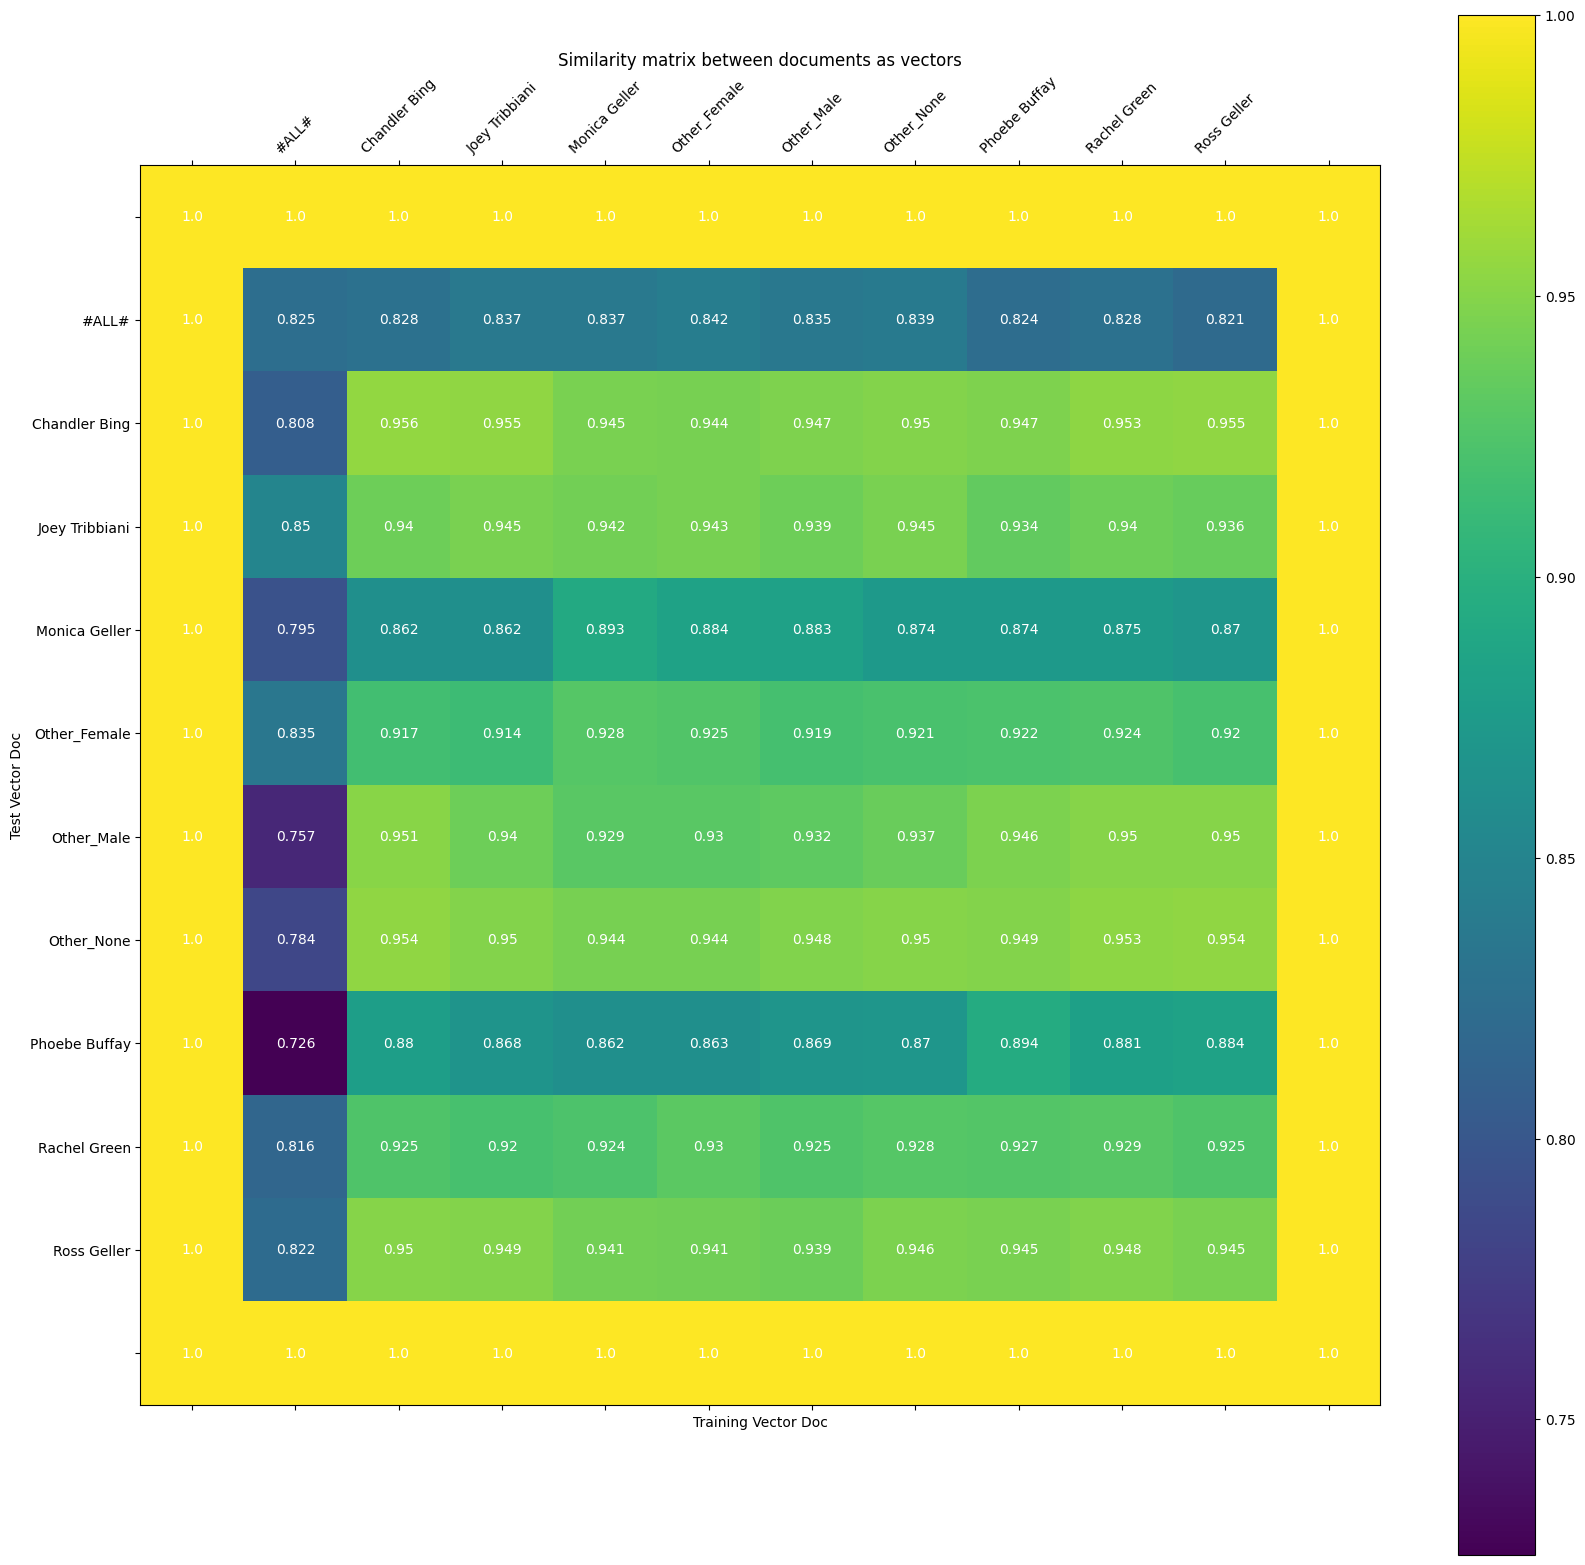

In [19]:
plot_heat_map_similarity(df)

 Parameter Search
It is a good practice to conduct a systematic parameter search instead of a random search as this will give you more 
reliable results. Given the scope of this assignment, it is possible to conduct a **grid search** on options you decided to try within the individual questions. The grid search should be done within the individual questions (i.e. Q1-Q3), and the later question should adopt the best settings from the previous questions. There is no need to do a grid search over all configurations from all questions as this will easily make the search unrealistic. E.g. Suppose we need 32, 90, and 4 runs to finish the grid search within questions, a cross-question grid search would need 32x90x4 = 11520 runs!                                                                      

In [20]:
def pre_process(character_text, lowercase=True, remove_stopwords=False, use_stemming=False, use_lemmatization=False):
    

    if lowercase:
        character_text = character_text.lower()

    # Remove punctuation
    character_text = re.sub(r'[^\w\s]', '', character_text)

    # Tokenization
    tokens = nltk.word_tokenize(character_text)

    if remove_stopwords:
        stop_words = set(stopwords.words('english'))
        tokens = [word for word in tokens if word not in stop_words]

    
    if use_stemming:
        stemmer = PorterStemmer()
        tokens = [stemmer.stem(word) for word in tokens]
    elif use_lemmatization:  # Only applied if stemming is not used
        lemmatizer = WordNetLemmatizer()
        tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return tokens

In [21]:
from sklearn.model_selection import ParameterGrid


preprocess_param_grid = {
    'lowercase': [True, False],
    'remove_stopwords': [True, False],
    'use_stemming': [True, False],  
      
}


best_performance = float('-inf')
best_params = {}

for params in ParameterGrid(preprocess_param_grid):
    # Pre-process training and validation documents with current parameters
    train_processed_docs = {name: pre_process(doc, **params) for name, doc in train_character_docs.items()}
    val_processed_docs = {name: pre_process(doc, **params) for name, doc in val_character_docs.items()}

    # Create corpus from processed docs
    train_corpus = [(name, doc) for name, doc in train_processed_docs.items()]
    val_corpus = [(name, doc) for name, doc in val_processed_docs.items()]

    # Create document matrices
    train_feature_matrix = create_document_matrix_from_corpus(train_corpus, fitting=True)
    val_feature_matrix = create_document_matrix_from_corpus(val_corpus, fitting=False)

    # Compute evaluation scores
    mean_rank, mean_cosine_similarity, accuracy, _ = compute_IR_evaluation_scores(train_feature_matrix, val_feature_matrix, train_labels, val_labels)

    # Determine the best performing parameters (based on your criteria, e.g., accuracy)
    if accuracy > best_performance:
        best_performance = accuracy
        best_params = params

# Output the best performing parameters
print("Best Parameters:", best_params)


mean rank 5.3
mean cosine similarity 0.9158715699789834
1 correct out of 10 / accuracy: 0.1
mean rank 4.2
mean cosine similarity 0.90254567244979
2 correct out of 10 / accuracy: 0.2
mean rank 3.3
mean cosine similarity 0.8976745837502191
2 correct out of 10 / accuracy: 0.2
mean rank 3.7
mean cosine similarity 0.8821044282412028
2 correct out of 10 / accuracy: 0.2
mean rank 4.8
mean cosine similarity 0.9169048907860606
3 correct out of 10 / accuracy: 0.3
mean rank 5.4
mean cosine similarity 0.9215053813743183
1 correct out of 10 / accuracy: 0.1
mean rank 3.3
mean cosine similarity 0.8976745837502191
2 correct out of 10 / accuracy: 0.2
mean rank 4.2
mean cosine similarity 0.894910666020959
3 correct out of 10 / accuracy: 0.3
Best Parameters: {'lowercase': False, 'remove_stopwords': True, 'use_stemming': True}


In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.util import ngrams
from nltk import pos_tag
from collections import Counter

def to_feature_vector_dictionary(character_doc, extra_features, tfidf_params):
    """
    Converts a list of pre-processed tokens to a feature vector dictionary.
    
    ::character_doc:: a list of pre-processed tokens from a character's lines
    ::extra_features:: any extra features for the character
    ::tfidf_params:: parameters for the TfidfVectorizer
    """
    # Create a TF-IDF vectorizer with given parameters and fit_transform on the character_doc
    tfidf_vectorizer = TfidfVectorizer(**tfidf_params)
    tfidf_vector = tfidf_vectorizer.fit_transform([' '.join(character_doc)])
    tfidf_features = dict(zip(tfidf_vectorizer.get_feature_names_out(), tfidf_vector.toarray()[0]))

    # Generate and count n-grams
    bigrams = ['_'.join(gram) for gram in ngrams(character_doc, 2)]
    trigrams = ['_'.join(gram) for gram in ngrams(character_doc, 3)]
    bigram_counts = Counter(bigrams)
    trigram_counts = Counter(trigrams)

    # POS Tagging and counting
    pos_tags = pos_tag(character_doc)
    pos_counts = Counter(tag for word, tag in pos_tags)

    # Combine all features into one dictionary
    feature_vector = {**tfidf_features, **bigram_counts, **trigram_counts, **pos_counts}

    # Add extra features
    for feature in extra_features:
        if feature in feature_vector:
            feature_vector[feature] += 1
        else:
            feature_vector[feature] = 1

    return feature_vector


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import ParameterGrid

# Define grid search parameters for TF-IDF
tfidf_param_grid = {
    'ngram_range': [(1, 1), (1, 2)],
    'use_idf': [True, False],
    'norm': ['l1', 'l2', None]
}

best_tfidf_performance = float('-inf')
best_tfidf_params = {}

corpusVectorizer = DictVectorizer()  # Assuming this is what you need
tfidf_transformer = TfidfTransformer()

# Define your train_corpus, val_corpus, train_labels, and val_labels somewhere here

for tfidf_params in ParameterGrid(tfidf_param_grid):
    # Initialize tfidf_vectorizer with the current parameters
    tfidf_vectorizer = TfidfVectorizer(**tfidf_params)

    train_feature_dicts = [to_feature_vector_dictionary(doc, [], tfidf_params) for _, doc in train_corpus]
    
    # Create feature vectors for the validation data
    val_feature_dicts = [to_feature_vector_dictionary(doc, [], tfidf_params) for _, doc in val_corpus]

    # Use your DictVectorizer and TF-IDF transformer to transform the feature dictionaries into a feature matrix
    if tfidf_params == list(ParameterGrid(tfidf_param_grid))[0]:  # Fit only on the first iteration
        corpusVectorizer.fit(train_feature_dicts + val_feature_dicts)
        transformed_train = corpusVectorizer.transform(train_feature_dicts)
        tfidf_transformer.fit(transformed_train)
    else:
        transformed_train = corpusVectorizer.transform(train_feature_dicts)

    # Transform the training and validation feature dictionaries
    train_feature_matrix = tfidf_transformer.transform(transformed_train)
    val_feature_matrix = tfidf_transformer.transform(corpusVectorizer.transform(val_feature_dicts))

    # Compute evaluation scores
    mean_rank, mean_cosine_similarity, accuracy, _ = compute_IR_evaluation_scores(train_feature_matrix, val_feature_matrix, train_labels, val_labels)

    # Determine the best performing TF-IDF parameters based on accuracy or other metrics
    if accuracy > best_tfidf_performance:
        best_tfidf_performance = accuracy
        best_tfidf_params = tfidf_params

# Output the best performing TF-IDF parameters
print("Best TF-IDF Parameters:", best_tfidf_params)


mean rank 4.2
mean cosine similarity 0.7283165497451326
3 correct out of 10 / accuracy: 0.3
mean rank 4.2
mean cosine similarity 0.7283165497451326
3 correct out of 10 / accuracy: 0.3
mean rank 4.2
mean cosine similarity 0.7282807011481187
3 correct out of 10 / accuracy: 0.3
mean rank 4.2
mean cosine similarity 0.7282807011481187
3 correct out of 10 / accuracy: 0.3
mean rank 3.7
mean cosine similarity 0.7350144160859502
2 correct out of 10 / accuracy: 0.2
mean rank 3.7
mean cosine similarity 0.7350144160859502
2 correct out of 10 / accuracy: 0.2
mean rank 4.2
mean cosine similarity 0.7283176893823959
3 correct out of 10 / accuracy: 0.3
mean rank 4.2
mean cosine similarity 0.7283176893823959
3 correct out of 10 / accuracy: 0.3
mean rank 4.2
mean cosine similarity 0.7282875856561425
3 correct out of 10 / accuracy: 0.3
mean rank 4.2
mean cosine similarity 0.7282875856561425
3 correct out of 10 / accuracy: 0.3
mean rank 3.7
mean cosine similarity 0.7350144160859502
2 correct out of 10 / ac

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import ParameterGrid


def create_document_matrix_from_corpus(corpus, tfidf_vectorizer, corpusVectorizer, tfidf_transformer, tfidf_params, fitting=False):
    """Method which fits different vectorizers on data and returns a matrix.
    
    ::corpus:: a list of (class_label, document) pairs.
    ::tfidf_vectorizer:: the TF-IDF vectorizer
    ::corpusVectorizer:: the DictVectorizer for corpus
    ::tfidf_transformer:: the TF-IDF transformer
    ::tfidf_params:: parameters for the TfidfVectorizer
    ::fitting:: a boolean indicating whether to fit/train the vectorizers (should be true on training data)
    """
    # Extract feature vectors for the corpus
    feature_dicts = [to_feature_vector_dictionary(doc, [], tfidf_params) for name, doc in corpus]

    # Fit and transform the corpus using DictVectorizer and then apply TF-IDF transformation
    if fitting:
        corpusVectorizer.fit(feature_dicts)
        transformed_corpus = corpusVectorizer.transform(feature_dicts)
        tfidf_transformer.fit(transformed_corpus)
    else:
        transformed_corpus = corpusVectorizer.transform(feature_dicts)

    # Apply TF-IDF transformation
    doc_feature_matrix = tfidf_transformer.transform(transformed_corpus)
    
    return doc_feature_matrix



In [25]:
from itertools import product
from sklearn.model_selection import ParameterGrid

# Define additional parameters to search for character document creation
character_doc_param_grid = {
    'max_line_count': [100, 200, 300],
    'context_size': [3, 5, 7]
}

best_overall_performance = float('-inf')
best_overall_params = {}
train_character_names = set(train_data['Character_name'].unique())
val_character_names = set(val_data['Character_name'].unique())

# Iterate over all combinations of parameters from the character_doc_param_grid
for character_doc_params in ParameterGrid(character_doc_param_grid):
    # Create character documents with the current parameters
    character_docs = create_character_document_from_dataframe(train_data, **character_doc_params)

    # Pre-process documents
    train_processed_docs = {name: pre_process(doc) for name, doc in character_docs.items() if name in train_character_names}
    val_processed_docs = {name: pre_process(doc) for name, doc in character_docs.items() if name in val_character_names}

    # Create training and validation corpus
    train_corpus = [(name, doc) for name, doc in train_processed_docs.items()]
    val_corpus = [(name, doc) for name, doc in val_processed_docs.items()]

    # Create document matrices
    training_feature_matrix = create_document_matrix_from_corpus(train_corpus, tfidf_vectorizer, corpusVectorizer, tfidf_transformer, tfidf_params, fitting=True)
    val_feature_matrix = create_document_matrix_from_corpus(val_corpus, tfidf_vectorizer, corpusVectorizer, tfidf_transformer, tfidf_params, fitting=False)

    # Compute evaluation scores
    mean_rank, mean_cosine_similarity, accuracy, _ = compute_IR_evaluation_scores(training_feature_matrix, val_feature_matrix, train_labels, val_labels)

    # Determine the best performing parameters
    if accuracy > best_overall_performance:
        best_overall_performance = accuracy
        best_overall_params = {'char_doc_params': character_doc_params}

# Output the best performing parameters
print("Best Overall Parameters:", best_overall_params)


lines per character {'#ALL#': 105, 'Chandler Bing': 120, 'Joey Tribbiani': 110, 'Monica Geller': 135, 'Other_None': 115, 'Phoebe Buffay': 100, 'Rachel Green': 120, 'Ross Geller': 105, 'Other_Female': 115, 'Other_Male': 125}
mean rank 1.0
mean cosine similarity 1.0
10 correct out of 10 / accuracy: 1.0
lines per character {'#ALL#': 210, 'Chandler Bing': 205, 'Joey Tribbiani': 215, 'Monica Geller': 255, 'Other_None': 230, 'Phoebe Buffay': 225, 'Rachel Green': 225, 'Ross Geller': 220, 'Other_Female': 210, 'Other_Male': 205}
mean rank 1.0
mean cosine similarity 1.0
10 correct out of 10 / accuracy: 1.0
lines per character {'#ALL#': 300, 'Chandler Bing': 355, 'Joey Tribbiani': 315, 'Monica Geller': 305, 'Other_None': 320, 'Phoebe Buffay': 300, 'Rachel Green': 355, 'Ross Geller': 315, 'Other_Female': 340, 'Other_Male': 305}
mean rank 1.0
mean cosine similarity 1.0
10 correct out of 10 / accuracy: 1.0
lines per character {'#ALL#': 105, 'Chandler Bing': 120, 'Joey Tribbiani': 110, 'Monica Geller

Analyse the similarity results
From your system so far run on the training/validation sets, identify the heldout character vectors ranked closest to each character's training vector which are not the character themselves, and those furthest away, as displayed using the `plot_heat_map_similarity` function. In your report, try to ascribe reasons why this is the case, particularly for those where there isn't a successful highest match between the target character in the training set and that character's vector in the heldout set yet. Observations you could make include how their language use is similar, resulting in similar word or ngram features.

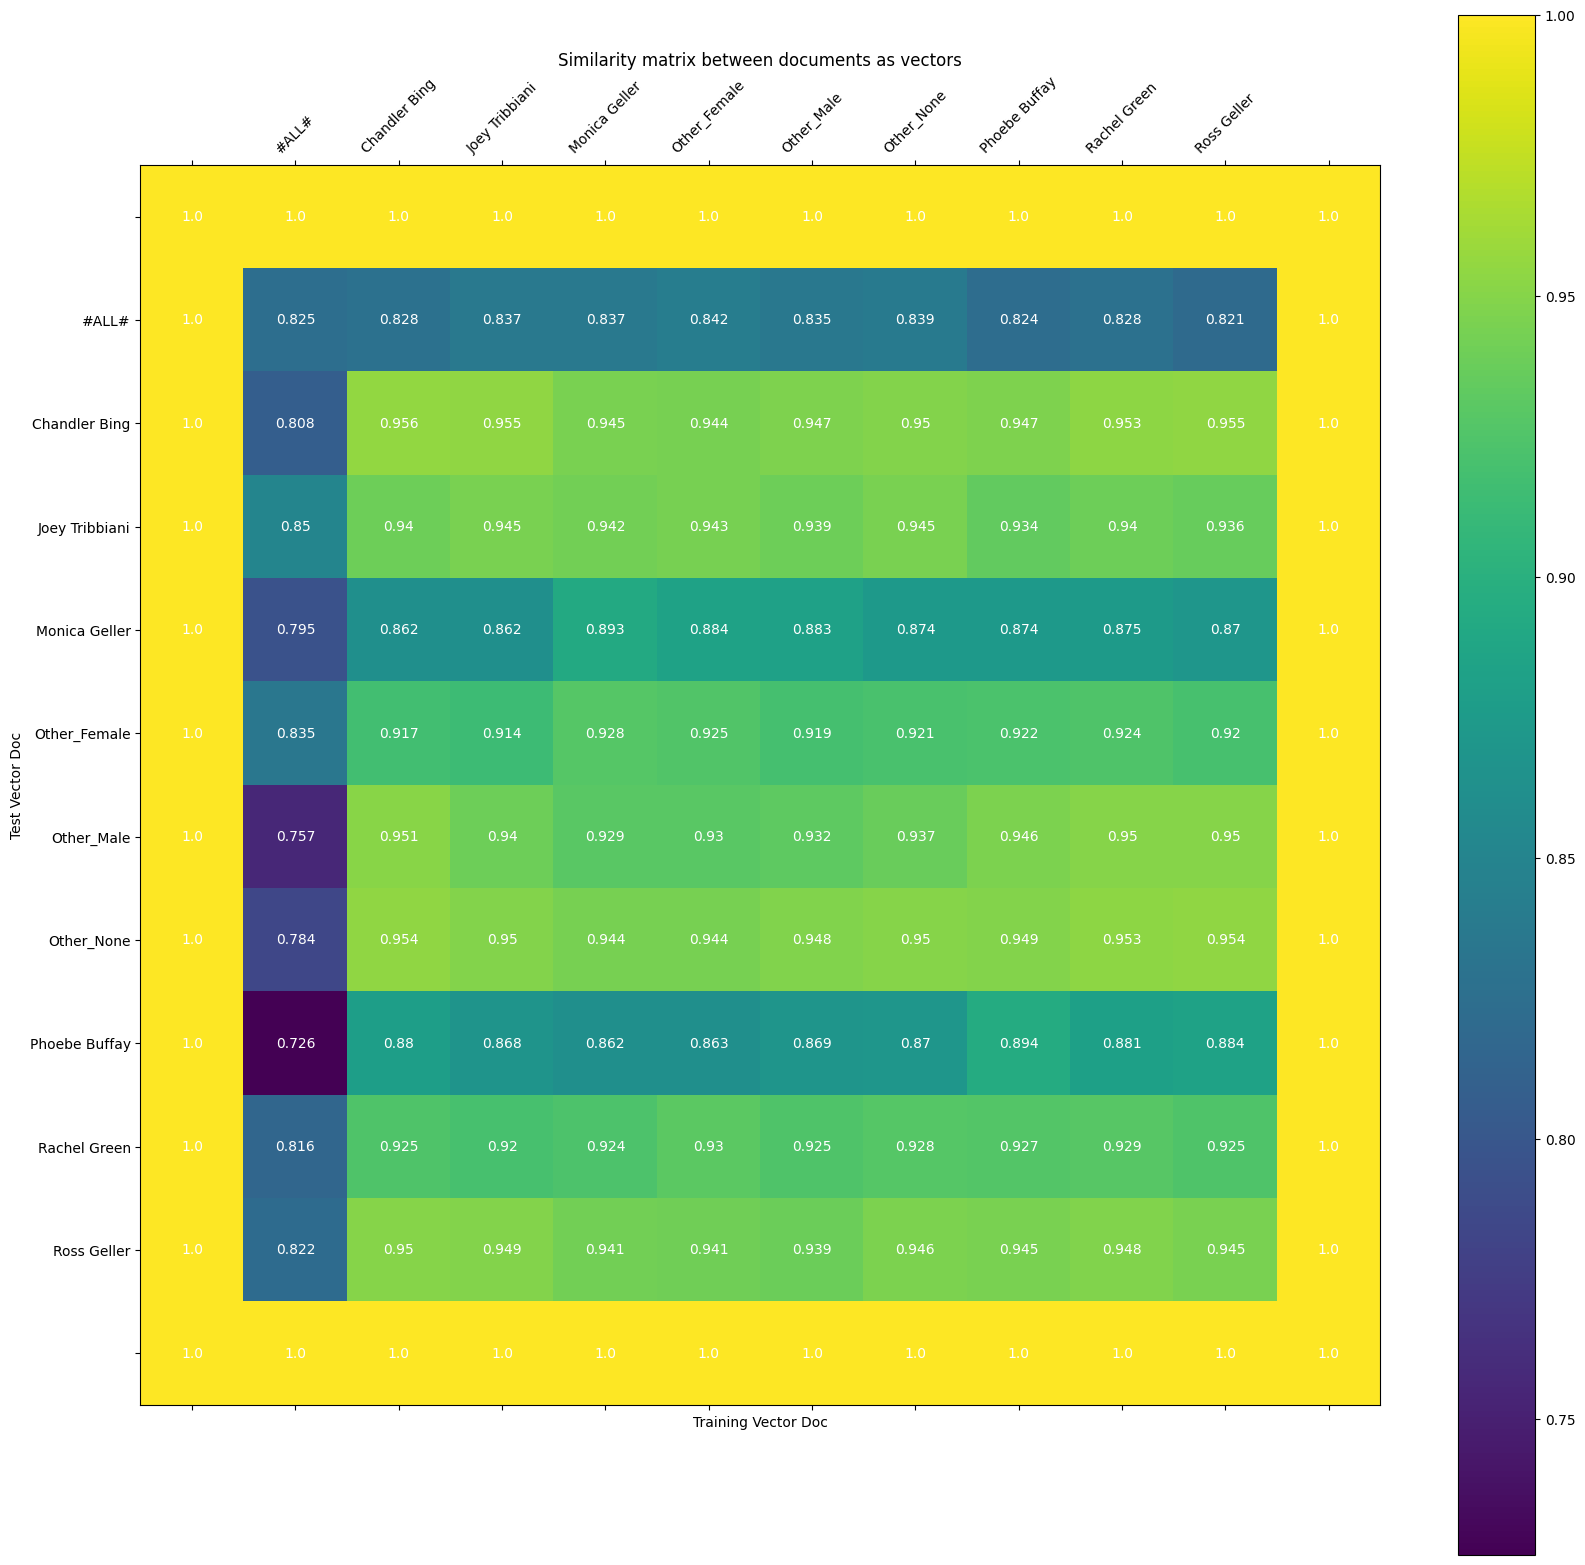

In [26]:
def plot_heat_map_similarity(df):
    """Takes a dataframe with header 'doc1, doc2, similarity'
    Plots a heatmap based on the similarity scores.
    """
    test_labels =  sorted(list(set(df.sort_values(['doc1'])['doc1'])))
    # add padding 1.0 values to either side
    cm = [[1.0,] * (len(test_labels)+2)]
    for target in test_labels:
        new_row = [1.0]
        for x in df.sort_values(['doc1', 'doc2'])[df['doc1']==target]['similarity']:
            new_row.append(x)
        new_row.append(1.0)
        cm.append(new_row)
    cm.append([1.0,] * (len(test_labels)+2))
    #print(cm)
    labels = [""] + test_labels + [""]
    fig = plt.figure(figsize=(20,20))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm)
    plt.title('Similarity matrix between documents as vectors')
    fig.colorbar(cax)
    ax.set_xticks(np.arange(len(labels)))
    ax.set_yticks(np.arange(len(labels)))
    ax.set_xticklabels( labels, rotation=45)
    ax.set_yticklabels( labels)

    for i in range(len(cm)):
        for j in range(len(cm)):

            text = ax.text(j, i, round(cm[i][j],3),
                           ha="center", va="center", color="w")

    plt.xlabel('Training Vector Doc')
    plt.ylabel('Test Vector Doc')
    #fig.tight_layout()
    plt.show()

plot_heat_map_similarity(df)


Run on final test data 
Test your best system using the code below to train on the training data (using the first 300 lines per character maximum) and do the final testing on the test file (using the first 30 lines per character maximum).

Make any necessary adjustments such that it runs in the same way as the training/testing regime you developed above- e.g. making sure any transformer objects are initialized before `create_document_matrix_from_corpus` is called. Make sure your best system is left in the notebook and it is clear what the mean rank and accuracy of document selection are on the test data.

In [27]:
# redo on training data with the first 300 character lines used
train_character_docs = create_character_document_from_dataframe(train_data, max_line_count=300)
print('Num. Characters: ',len(train_character_docs.keys()),"\n")
total_words = 0
for name in train_character_docs.keys():
    print(name, 'Number of Words: ',len(train_character_docs[name].split()))
    total_words += len(train_character_docs[name].split())
print("total words", total_words)

training_corpus = [(name, pre_process(doc)) for name, doc in sorted(train_character_docs.items())]
train_labels = [name for name, doc in training_corpus]

training_feature_matrix = create_document_matrix_from_corpus(training_corpus, tfidf_vectorizer, corpusVectorizer, tfidf_transformer, tfidf_params, fitting=True)

# get the test data using 40 lines per character
test_character_docs = create_character_document_from_dataframe(test_data, max_line_count=30)
print('Num. Characters: ',len(test_character_docs.keys()),"\n")
total_words = 0
for name in test_character_docs.keys():
    print(name, 'Number of Words: ',len(test_character_docs[name].split()))
    total_words += len(test_character_docs[name].split())
print("total words", total_words)

# create list of pairs of (character name, pre-processed character) 
test_corpus = [(name, pre_process(doc)) for name, doc in sorted(test_character_docs.items())]
test_labels = [name for name, doc in test_corpus]


# Just transform the val_feature_matrix, don't fit
test_feature_matrix = create_document_matrix_from_corpus(test_corpus, tfidf_vectorizer, corpusVectorizer, tfidf_transformer, tfidf_params, fitting=False)

mean_rank, mean_cosine_simliarity, acc, df = compute_IR_evaluation_scores(training_feature_matrix, test_feature_matrix, train_labels, test_labels)

lines per character {'#ALL#': 300, 'Chandler Bing': 355, 'Joey Tribbiani': 315, 'Monica Geller': 305, 'Other_None': 320, 'Phoebe Buffay': 300, 'Rachel Green': 355, 'Ross Geller': 315, 'Other_Female': 340, 'Other_Male': 305}
Num. Characters:  10 

#ALL# Number of Words:  6851
Chandler Bing Number of Words:  7944
Joey Tribbiani Number of Words:  7389
Monica Geller Number of Words:  6824
Other_None Number of Words:  5271
Phoebe Buffay Number of Words:  6170
Rachel Green Number of Words:  8359
Ross Geller Number of Words:  6923
Other_Female Number of Words:  6877
Other_Male Number of Words:  5808
total words 68416
lines per character {'Chandler Bing': 55, 'Joey Tribbiani': 30, 'Ross Geller': 60, '#ALL#': 30, 'Other_Female': 55, 'Other_None': 30, 'Monica Geller': 85, 'Phoebe Buffay': 40, 'Rachel Green': 30, 'Other_Male': 35}
Num. Characters:  10 

Chandler Bing Number of Words:  1144
Joey Tribbiani Number of Words:  667
Ross Geller Number of Words:  1220
#ALL# Number of Words:  545
Other_Fe